# **Parcial 1 -Aprendizaje de máquina / Daniel Ricardo Rodriguez Olarte**

**Punto 1.2**

 a) Dinero , Ganador , Ganar ,Comprar ,Vender , Tenemos a tu tia

 b) "Tu nombre" , "pregunta" , "tarea"

 c) El parámetro b afecta directamente que mensajes serán clasificados como spam

**Punto 1.3**

a) para todo $x_n$ bien clasificado $y(t)=sign(w^Tx_n)$ pero como x(t) esta mal clasificado por w(t) entonces $y(t)\neq sign(w^Tx)$ entonces $y(t)w^T(t)x(t)<0$

b) $y(t)w^T(t+1)x(t)=y(t)(w(t)+y(t)x(t))^Tx(t) =y(t)(w^T(t)+y(t)x^T(t))x(t) =
y(t)w^T(t)x(t)+y(t)y(t)x^T(t)x(t) >y(t)w^T(t)x(t) $ 

ya que en cualquier caso $y(t)y(t)x^T(t)x(t) >0 $

c) w(t) a w(t+1) es un movimiento que va en la dirección correcta precisamente por lo concluido en los dos puntos anterior sabemos que $y(t)w^T(t)x(t)$ va creciendo a medida que t aumenta , y como  $y(t)\neq sign(w^Tx)$ entonces concluimos que $w^Tx$ va yendo hacia al area negativa o positiva dependiendo del signo de $y$ 
                   

**Punto 1.10**


In [ ]:
# 1.10 (a) 
import numpy as np
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
def flip_coins(total_coins):
     #cara: 1, sello: 0
    carasello = np.random.binomial(1,0.5,total_coins)
    return carasello
def experiment_coin(total_coins, total_flips ,print_frecuency=0):
    caras_sum = np.zeros(total_coins) 
    #vamos a ir sumando las caras resultantes despues de lanzar 10 veces 1000 monedas
    for flip in range(total_flips):
        caras_sum = caras_sum + flip_coins(total_coins)
    
    frecuencia = caras_sum/total_flips   

    crand = np.random.choice(total_coins) #moneda random
    v1 = frecuencia[0]  #para la primera moneda
    vrand = frecuencia[crand] #para una moneda random
    cmin = np.argmin(caras_sum) #la moneda que tuvo menor caras
    vmin = frecuencia[cmin] #para la cmin
    if (print_frecuency==True):
     print('Frequency of first coin: ',v1)
     print('Frequency of a random coin:',vrand)
     print('Frequency of the coin with minimum frequency:',vmin)

    return v1,vrand,vmin
total_coins = 1000
total_flips = 10
experiment_coin(total_coins, total_flips,1)

Frequency of first coin:  0.4
Frequency of a random coin: 0.3
Frequency of the coin with minimum frequency: 0.0


(0.4, 0.3, 0.0)

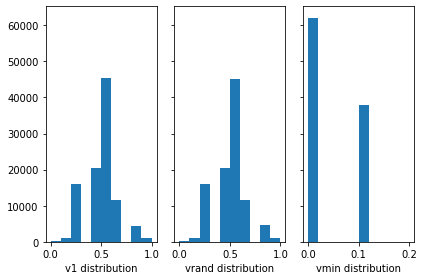

In [ ]:
# Exercise 1.10 (b) 
total_coins = 1000
total_flips = 10  
total_runs = 100000
v1s, vrands, vmins = [],[],[]
for run in range(total_runs):
    v1,vrand,vmin = experiment_coin(total_coins, total_flips)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)
fig, axs = plt.subplots(1,3,sharey=True)
axs[0].hist(v1s,bins=10)
axs[0].set_xlabel('v1 distribution')
axs[1].hist(vrands,bins=10)
axs[1].set_xlabel('vrand distribution')
axs[2].hist(vmins,bins=10)
axs[2].set_xlabel('vmin distribution')
fig.tight_layout()
plt.show()

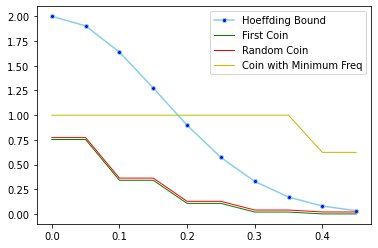

In [ ]:
# Exercise 1.10 (c)
eps = np.arange(0.0,0.5,0.05)
#variamos el epsilon de a 0.05 
#miu de 0.5
pfirst=np.zeros(total_flips)
prand=np.zeros(total_flips)
pmin = np.zeros(total_flips)
for i in range(10):
    pfirst[i] = np.sum(np.abs(v1s-0.5) > eps[i])/total_runs
    prand[i] = (np.sum(np.abs(vrands-0.5) > eps[i])/total_runs)+0.02 #0.02 para apreciar mejor la grafica
    pmin[i] = np.sum(np.abs(vmins-0.5) > eps[i])/total_runs
def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)
#puntos para la cota
bounds = hoeffding_bound(eps, total_flips)
plt.plot(eps, bounds, marker='.', markerfacecolor='b', markersize=8, color='skyblue', label='Hoeffding Bound')
plt.plot(eps, pfirst, marker='', color='g', linewidth=1, label='First Coin')
plt.plot(eps, prand, marker='', color='r', linewidth=1, label='Random Coin')
plt.plot(eps, pmin, marker='', color='y', linewidth=1, label='Coin with Minimum Freq')
plt.legend()

(d) Los experimentos con las  primeras y aleatorias monedas obedece la cota de Hoeffding. La moneda con frecuencia mínima falla al la cota de Hoeffding, ya que se debe a que para los dos primeros experimetos, las monedas se escogian antes de que se realizaba los experimentos, mientras que para el último, primero tenemos que lanzar todas las monedas y usar los datos para calcular cuál es la moneda con la frecuencia mínima de caras. recordemos que la desigualdad de Hoeffding, que dice que la hipótesis $ h $ se ha recogido antes de que se extraigan las muestras y por esta razón no se cumple para el último experimento.

(e) Solo se escoje el contenedor hasta despues de muestrear los datos , lo mismo que pasa con el la frecuencia minima de caras ,Las otras dos monedas se eligieron antes del muestreo, que es elegir el contenedor de antemano.

**Punto 1.11**

a) No no podemos garantizar eso , por ejemplo si tenemos 25 ejemplos con +1 en $\mathcal{D}$ y el resto de X en -1 , no coincidira con f afuera .

b) si es posible , puede ser que $\mathcal{C}$ tenga distribuido la mitad en +1 y la otra en -1 y almenos se acercara la mitad a f

c)
$P\left[E_{out}(S(\mathcal{D})) < E_{out}(C(\mathcal{D}))  \right] =$ $P\left[E_{out}(h_1) < E_{out}(h_2)  \right] $

= $P\left[P\left[f(x) \neq h1\right] < P\left[f(x) \neq h2\right]  \right] =$
$P\left[P\left[f(x) = -1\right] < P\left[f(x) =+1\right]  \right] =$

$= P\left[1-p< p \right] = P\left[0.1 < 0.9 \right] = 1$

d) cuando $p<0.5 $ ,C producirá una hipótesis mejor que S

**Problema $|\theta^*|^2/\gamma^2$ bold text**

El número de pasos del perceptron dependerá del márgen de
separación y es inversamente proporcional al cuadrado del márgen.  , este valor equivale al máximo número de pasos que se tardará en obtener una solución




**PROBLEMA DEL XOR** 
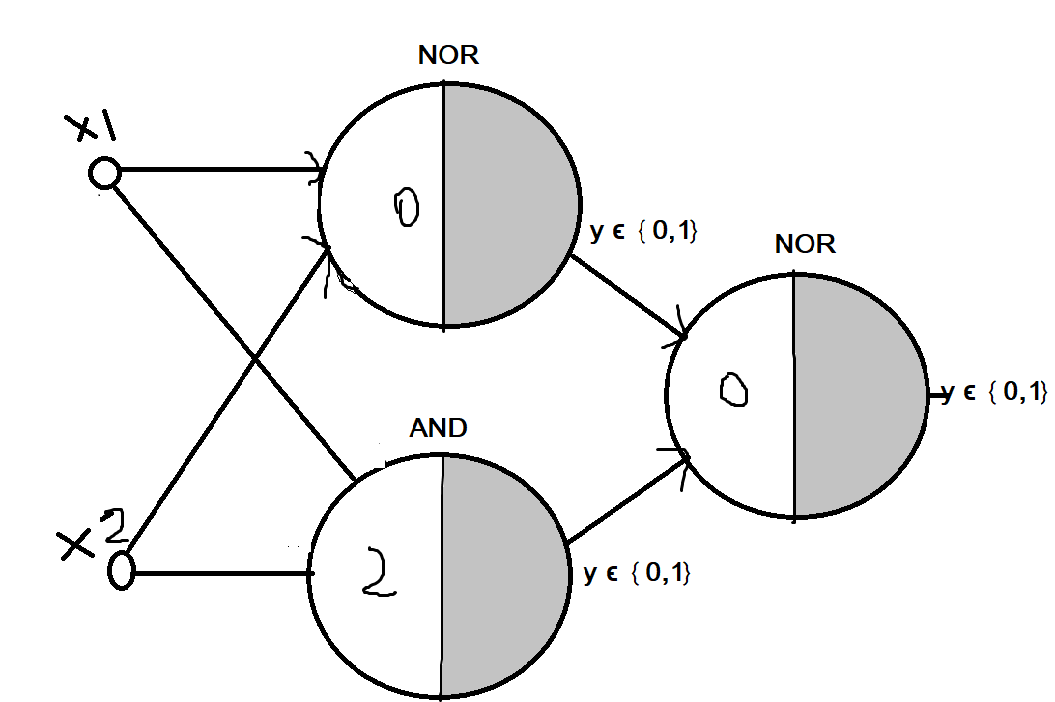
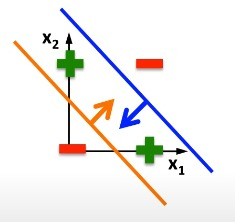